In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import cv2.cv as cv

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
coinsImage = cv2.imread('coins.JPG')

In [3]:
coinsImage = cv2.cvtColor(coinsImage, cv2.COLOR_BGR2RGB)

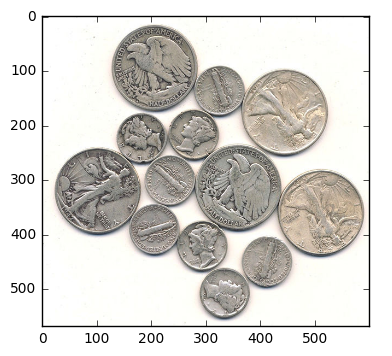

In [4]:
plt.imshow(coinsImage)

In [5]:
coinsGrayImage = cv2.cvtColor(coinsImage, cv2.COLOR_RGB2GRAY)

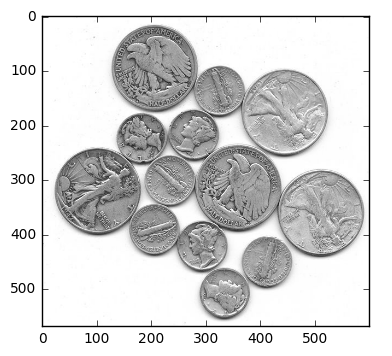

In [6]:
plt.imshow(coinsGrayImage, cmap = "gray")

In [16]:
returnData, thresholdFilteredImage = cv2.threshold(coinsGrayImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print returnData, thresholdFilteredImage

197.0 [[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


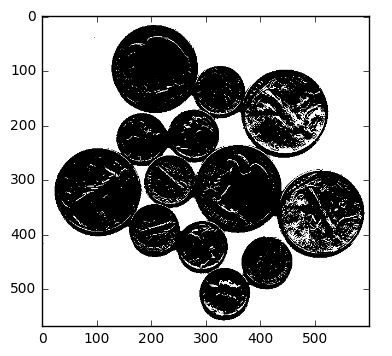

In [17]:
plt.imshow(thresholdFilteredImage, cmap = "gray")

In [28]:
noiseRemoveKernel = np.ones((5, 5), np.uint8)
noiseFilteredImage = cv2.morphologyEx(thresholdFilteredImage, cv2.MORPH_OPEN, noiseRemoveKernel, iterations = 2)
print noiseFilteredImage

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


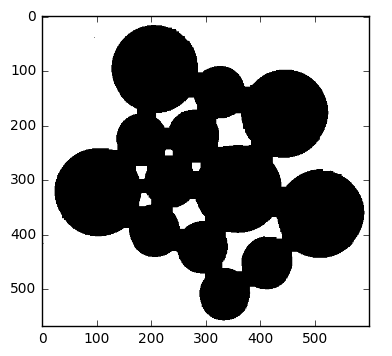

In [29]:
plt.imshow(noiseFilteredImage, cmap = "gray")

In [31]:
sureBackgroundImage = cv2.dilate(noiseFilteredImage, noiseRemoveKernel, iterations = 3)
print sureBackgroundImage

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


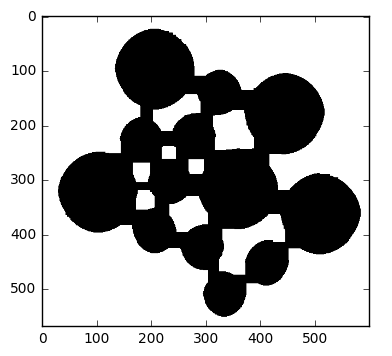

In [32]:
plt.imshow(sureBackground, cmap = "gray")

In [33]:
distTransformData = cv2.distanceTransform(noiseFilteredImage, cv.CV_DIST_L2, 5)
print distTransformData

[[ 102.87597656  101.87597656  100.87597656 ...,  154.96841431
   155.57150269  156.17459106]
 [ 102.67907715  101.67907715  100.67907715 ...,  154.17150879
   154.77459717  155.37768555]
 [ 102.48217773  101.48217773  100.48217773 ...,  153.37460327
   153.97769165  154.58078003]
 ..., 
 [ 148.          148.          148.         ...,  139.00775146
   139.40466309  139.80465698]
 [ 149.          149.          149.         ...,  139.80465698
   140.40466309  140.6015625 ]
 [ 150.          150.          150.         ...,  140.6015625   141.20465088
   141.6015625 ]]


In [57]:
returnData, sureForegroundImage = cv2.threshold(distTransformData, 0.1 * distTransformData.max(), 255, 0)
print returnData, sureForegroundImage

16.6491088867 [[ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 ..., 
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]]


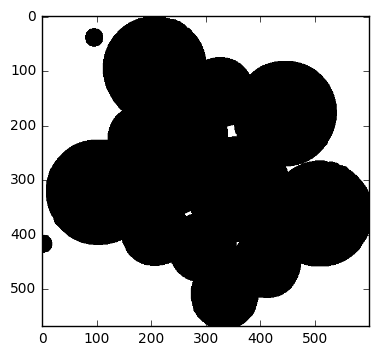

In [58]:
plt.imshow(sureForegroundImage, cmap = "gray")

In [59]:
sureForegroundImage = np.uint8(sureForegroundImage)
unkownRegionImage = cv2.subtract(sureBackground, sureForegroundImage)
print unkownRegionImage

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


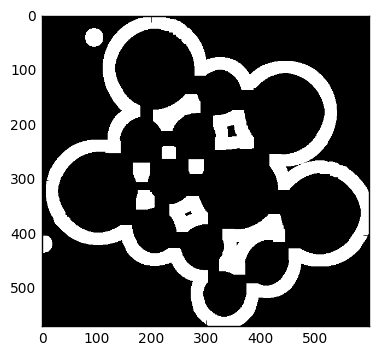

In [60]:
plt.imshow(unkownRegionImage, cmap = "gray")

In [ ]:
returnData, markerImage = cv2.conn